<a href="https://colab.research.google.com/github/Daria13-gif/cs102/blob/homework06/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_22_23_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [ ]:
import pandas as pd


df = pd.read_csv("music_genre.csv")
df = df.sample(20000)
df = df.drop_duplicates()
df_empty = df.loc[df["artist_name"] == "empty_field"]
print(df_empty)
df = df.loc[df["artist_name"] != "empty_field"] # метод loc фильтрует строки по заданному критерию


       instance_id  artist_name  \
36044      31405.0  empty_field   
41674      52318.0  empty_field   
10960      85675.0  empty_field   
49415      75105.0  empty_field   
42662      76878.0  empty_field   
...            ...          ...   
28346      55063.0  empty_field   
6523       38850.0  empty_field   
47447      72921.0  empty_field   
15357      58816.0  empty_field   
26546      73935.0  empty_field   

                                              track_name  popularity  \
36044                                            Runaway        60.0   
41674  Violin Partita No. 1 in B Minor, BWV 1002: III...        24.0   
10960                              America The Beautiful        35.0   
49415                                        BLESSED NOW        52.0   
42662  La clemenza di Tito, K. 621, Act II: Deh per q...         0.0   
...                                                  ...         ...   
28346                                           Sriracha        62.0   
652

### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("music_genre.csv")
df = df.sample(20000)
df = df.drop_duplicates()
list_genre = (df.music_genre.unique())[:-1] # в дф обращаемся к столбику music_genre
# и выводим уникальныее значения


# 1. Выведите долю каждого жанра в датасете.
dict_music_genre = {}
for i in list_genre:
    # идем по всем i в списке и считаем количество строк с данным значением
    dict_music_genre[i] = len(df.loc[df["music_genre"] == i]) // 200
for i in dict_music_genre:
    print(i, dict_music_genre[i])

Hip-Hop 10
Rap 10
Rock 9
Blues 9
Electronic 10
Anime 10
Classical 10
Country 9
Alternative 9
Jazz 9


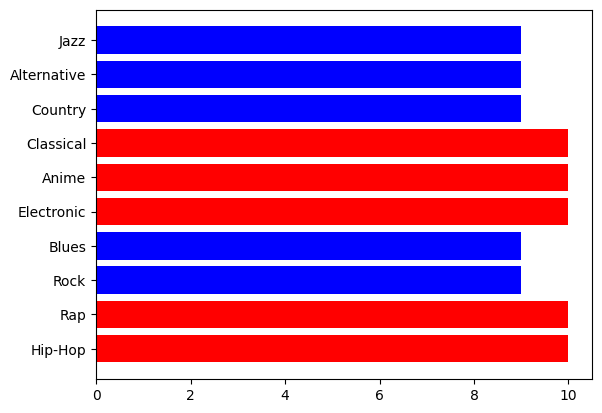

In [27]:
# 2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам.
# Выделите контрастным цветом жанр, в котором больше всего песен.
x = list_genre
y = dict_music_genre.values()
m = max(y)
colors = []
for i in y:
    if i == m:
        colors.append('r')
    else:
        colors.append('b')

# указываем тип диаграммы и подаем ей данные - название данных(х) и второре значение(у),
# передаем цвета
plt.barh(x, y, color=colors)
plt.show()

In [28]:
# 3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее
# значение показателя danceability должно быть наивысшим.
dict_danceability = {}
for i in list_genre:
    dict_danceability[i] = df.loc[df["music_genre"] == i]["danceability"].mean()
print(max(dict_danceability, key=dict_danceability.get))

Hip-Hop


In [31]:
# 4. Для каждого жанра определите, какая тональность в нем преобладает – количество
# треков какой тональность больше (минор или мажор).
dict_mode = {}
for i in list_genre:
    print(len(df.loc[(df["music_genre"] == i)
                  & (df["mode"] == "Major")]), len(df.loc[(df["music_genre"] == i)
                                                           & (df["mode"] == "Minor")]))
    if len(df.loc[(df["music_genre"] == i)
                  & (df["mode"] == "Major")]) > len(df.loc[(df["music_genre"] == i)
                                                           & (df["mode"] == "Minor")]):
        dict_mode[i] = "Major"
    elif len(df.loc[(df["music_genre"] == i)
                  & (df["mode"] == "Major")]) < len(df.loc[(df["music_genre"] == i)
                                                           & (df["mode"] == "Minor")]):
        dict_mode[i] = "Minor"
    else:
        dict_mode[i] = "The values are the same"

for i in dict_mode:
    print(i, dict_mode[i])

1132 910
1107 939
1406 538
1373 580
1083 927
1256 767
1366 679
1731 248
1235 741
1050 930
Hip-Hop Major
Rap Major
Rock Major
Blues Major
Electronic Major
Anime Major
Classical Major
Country Major
Alternative Major
Jazz Major


### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [34]:
# 1
# исполнитель, у которого больше всего треков в датасете
df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

df = df['artist_name'].value_counts(normalize=True).head(1)
df

Wolfgang Amadeus Mozart    0.008466
Name: artist_name, dtype: float64

In [35]:
# исполнитель, у которого меньше всего треков в датасете
df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

df = df['artist_name'].value_counts(normalize=True).tail(1)
df

Soichi Terada    0.000053
Name: artist_name, dtype: float64

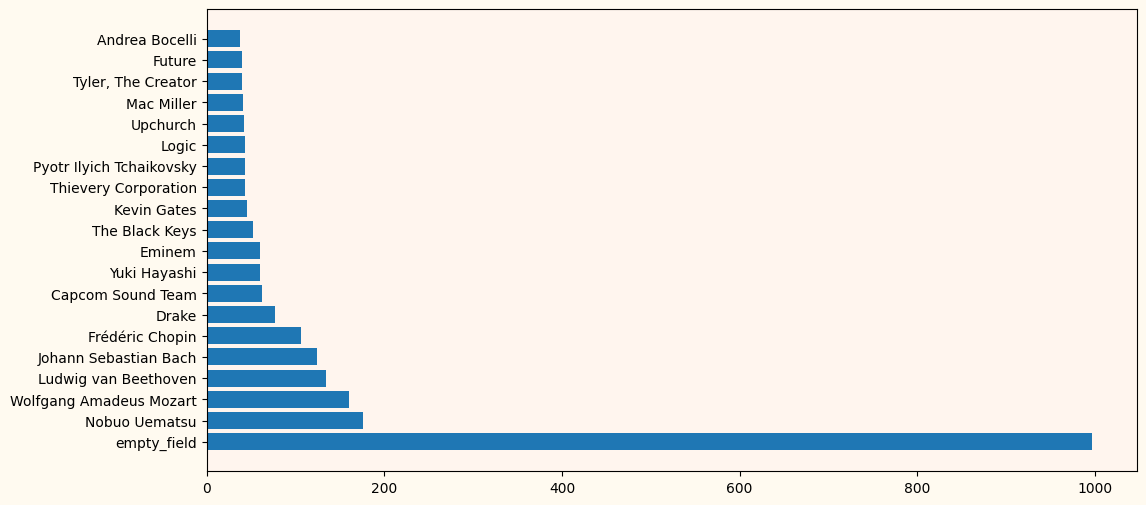

In [36]:
# 2
# Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.
# принимаем данные и место, где мы отображаем данные(ах)
fig, ax = plt.subplots()
x = list(sorted_dict_artist.keys())[:20]
y = list(sorted_dict_artist.values())[:20]

# указываем тип диаграммы и подаем ей данные - название данных(х) и второре значение(у),
# передаем цвета
ax.barh(x, y)
fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')
plt.show()

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [40]:
# корреляционная матрица для характеристик треков
df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

corrM = df.corr()
corrM

<ipython-input-40-2a17e0ab3d49>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = df.corr()


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000000,0.007245,0.003877,-0.004962,-0.004552,0.001605,-0.001084,0.005878,0.001171,-0.006433,-0.005589
popularity,0.007245,1.000000,-0.284414,0.369090,-0.075288,0.215885,-0.361354,-0.044944,0.316320,0.230034,0.133910
acousticness,0.003877,-0.284414,1.000000,-0.351580,0.061068,-0.796773,0.389106,-0.105943,-0.734483,-0.166724,-0.274301
danceability,-0.004962,0.369090,-0.351580,1.000000,-0.144996,0.270776,-0.311992,-0.048808,0.395696,0.289002,0.445655
duration_ms,-0.004552,-0.075288,0.061068,-0.144996,1.000000,-0.063162,0.120570,0.023500,-0.095625,-0.086840,-0.124021
energy,0.001605,0.215885,-0.796773,0.270776,-0.063162,1.000000,-0.392330,0.184686,0.839386,0.159299,0.394740
instrumentalness,-0.001084,-0.361354,0.389106,-0.311992,0.120570,-0.392330,1.000000,-0.096308,-0.525929,-0.203771,-0.283189
liveness,0.005878,-0.044944,-0.105943,-0.048808,0.023500,0.184686,-0.096308,1.000000,0.129403,0.114635,0.048205
loudness,0.001171,0.316320,-0.734483,0.395696,-0.095625,0.839386,-0.525929,0.129403,1.000000,0.167047,0.340389
speechiness,-0.006433,0.230034,-0.166724,0.289002,-0.086840,0.159299,-0.203771,0.114635,0.167047,1.000000,0.059976


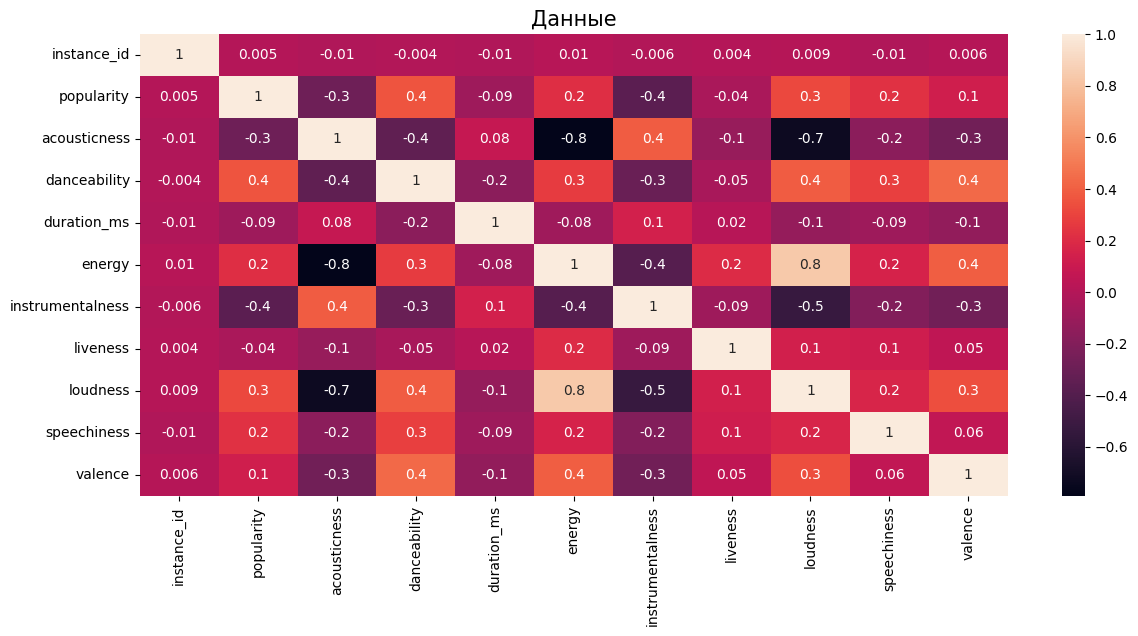

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("music_genre.csv")
df = df.sample(20000)
df = df.drop_duplicates()
list_genre = (df.music_genre.unique())[:-1] # в дф обращаемся к столбику music_genre
# и выводим уникальныее значения


# 1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная
# корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt='.1g', ax=ax)
ax.set_title('Данные', fontsize=15)
fig.set_figwidth(14)
fig.set_figheight(6)
plt.show()

In [38]:
# 2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.
df['len'] = df['track_name'].str.len()
corr_between_st = df["popularity"].corr(df["len"])
print(corr_between_st)

-0.21581036112907606


### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

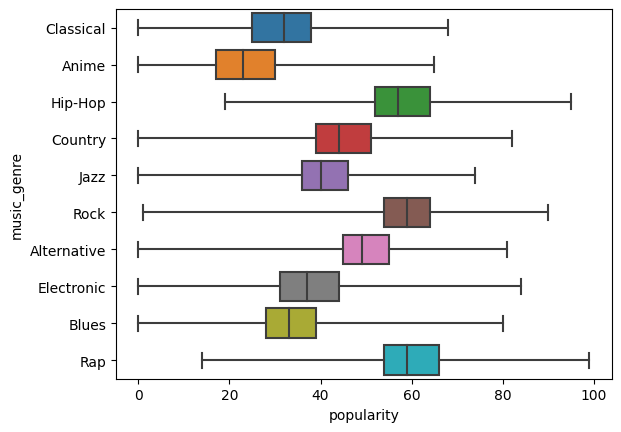

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("music_genre.csv")
df = df.sample(20000)
df = df.drop_duplicates()
# указываем тип диаграммы и подаем ей данные - название данных(х) и второре значение(у),
# передаем цвета
sns.boxplot(x='popularity', y='music_genre', data=df, whis=10)
plt.show()


### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

['Rap', 'Rock', 'Hip-Hop'] [60.688924218335984, 59.530403679100665, 58.68941429339065]
Drake 34 1853
The Beatles 28 1929
Drake 39 1822


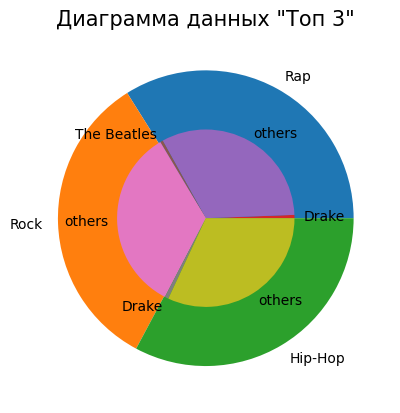

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("music_genre.csv")
df = df.sample(20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]
# list_genre = (df.music_genre.unique())[:-1] # в дф обращаемся к столбику music_genre
# и выводим уникальныее значения
list_genre = df["music_genre"].value_counts().index.tolist()

dict_popularity = {}
for i in list_genre:
    dict_popularity[i] = df.loc[df["music_genre"] == i]["popularity"].mean()
dict_popularity = dict(sorted(dict_popularity.items(), key=lambda item: (item[1], item[0]), reverse=True))
key = list(dict_popularity.keys())[:3]
value = list(dict_popularity.values())[:3]
print(key, value)
list_res = []
list_name = []
for i in key:
    s = df[df['music_genre'] == i]['artist_name'].value_counts()
    n = s[0]
    k = len(df[df['music_genre'] == i]) - n
    name = s.index.tolist()[0]
    list_name.append(name)
    list_name.append('others')
    print(name, n, k)
    list_res.append([n, k])
res = np.array(list_res)
fig, ax = plt.subplots()
ax.pie(value, labels=key, radius=1)
ax.pie(res.flatten(), labels=list_name, radius=0.6)
ax.set_title('Диаграмма данных "Топ 3"', fontsize=15)
plt.show()

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

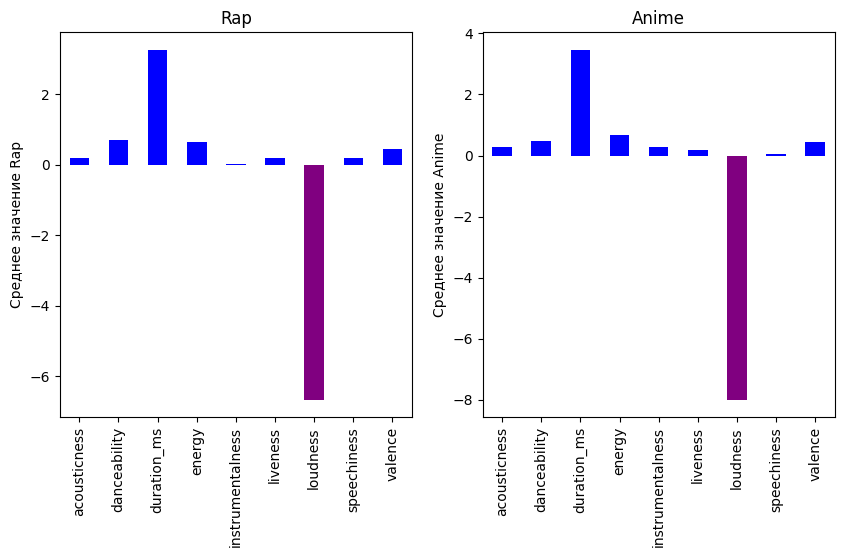

In [14]:
df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

import pandas as pd
import matplotlib.pyplot as plt

df.loc[:, "duration_ms"] = df["duration_ms"] / 60000

df = df.drop(["instance_id"], axis=1)
df_mean = df.groupby("music_genre").mean(numeric_only=True)

df_mean = df_mean.sort_values(by="popularity", ascending=False)
df_mean = df_mean.drop(["popularity"], axis=1)

top_genre = df_mean.iloc[0]
bottom_genre = df_mean.iloc[-1]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title(top_genre.name)
ax[1].set_title(bottom_genre.name)

ax[0].set_ylabel(f"Среднее значение {top_genre.name}")
ax[1].set_ylabel(f"Среднее значение {bottom_genre.name}")
ax[0].set_xticks(range(len(df_mean.columns)))
ax[1].set_xticks(range(len(df_mean.columns)))
ax[0].set_xticklabels(df_mean.columns, rotation=90)
ax[1].set_xticklabels(df_mean.columns, rotation=90)


top_genre.plot.bar(ax=ax[0], color=["blue" if x > 0 else "purple" for x in top_genre])
bottom_genre.plot.bar(ax=ax[1], color=["blue" if x > 0 else "purple" for x in bottom_genre])
plt.show()

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [19]:
import random
random.seed(13)

df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

# добавьте в данные категориальный столбец длительность_трека
def duration_category(duration):
    if duration <= 3 * 60 * 1000:
        return 'короткая'
    elif duration <= 5 * 60 * 1000:
        return 'средняя'
    else:
        return 'длинная'

df['длительность_трека'] = df['duration_ms'].apply(duration_category)
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
48189,39137.0,XXXTENTACION,STARING AT THE SKY,72.0,0.134000,0.557,85124.0,0.338,0.001840,F,0.1400,-9.892,Major,0.0257,140.935,4-Apr,0.689,Hip-Hop,короткая
2770,20061.0,Archive,Remains of Nothing,42.0,0.296000,0.637,456043.0,0.458,0.000109,D,0.5090,-7.700,Minor,0.0289,83.00200000000001,4-Apr,0.250,Electronic,длинная
20369,80341.0,Barbara Mandrell,I Was Country When Country Wasn't Cool - (Duet...,47.0,0.099100,0.607,220373.0,0.546,0.000159,C,0.8690,-11.228,Major,0.0392,104.91799999999999,4-Apr,0.526,Country,средняя
25348,66741.0,Quality Control,We The Ones,63.0,0.032400,0.902,194025.0,0.712,0.000000,B,0.1710,-3.466,Minor,0.1950,93.995,4-Apr,0.108,Rap,средняя
5572,42771.0,Yuki Hayashi,腹の探り合い,17.0,0.666000,0.590,84267.0,0.312,0.900000,E,0.0940,-17.472,Minor,0.0419,100.12200000000001,4-Apr,0.306,Anime,короткая
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19580,48024.0,Trivium,Pull Harder on the Strings of Your Martyr,47.0,0.000015,0.229,291213.0,0.988,0.000272,A#,0.0949,-3.475,Major,0.1160,144.96,4-Apr,0.359,Alternative,средняя
31297,29608.0,Black Pistol Fire,Crows Feet,30.0,0.061800,0.389,160440.0,0.829,0.001250,G,0.1680,-5.580,Major,0.1500,122.051,4-Apr,0.435,Blues,короткая
30904,58649.0,Mary Wells,The Day Will Come,40.0,0.587000,0.699,139960.0,0.394,0.000000,G#,0.4910,-10.399,Major,0.0371,?,4-Apr,0.912,Blues,короткая
27838,48372.0,Dreezy,Chanel Slides (feat. Kash Doll),59.0,0.005700,0.809,174177.0,0.535,0.000000,C#,0.3010,-6.186,Major,0.0580,146.224,4-Apr,0.226,Rap,короткая


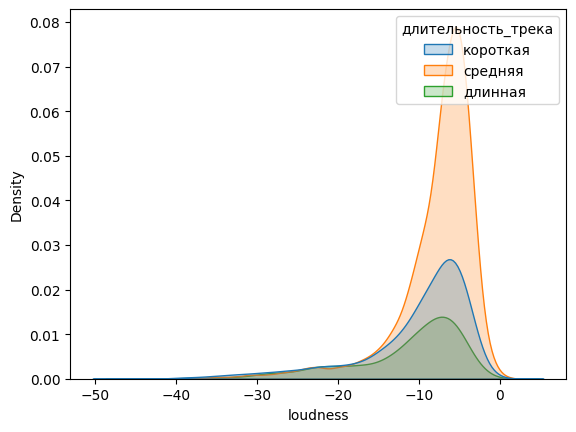

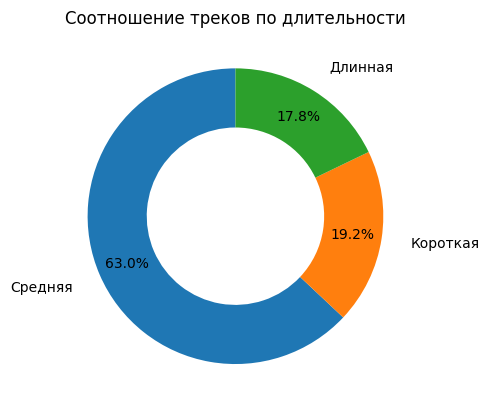

In [25]:
#Предыдущая часть

import random
random.seed(13)

df = pd.read_csv('music_genre.csv')
df = df.sample(n = 20000)
df = df.drop_duplicates()
df = df[(df.artist_name != 'empty_field')]

# добавьте в данные категориальный столбец длительность_трека
def duration_category(duration):
    if duration <= 3 * 60 * 1000:
        return 'короткая'
    elif duration <= 5 * 60 * 1000:
        return 'средняя'
    else:
        return 'длинная'

df['длительность_трека'] = df['duration_ms'].apply(duration_category)
df
#-------------------------------------------------------------------------

# график плотности распределения данных в столбце loudness
import seaborn as sns
sns.kdeplot(data=df, x='loudness', hue='длительность_трека', fill=True)
plt.show()

#численное соотношение треков разной длительности    
duration_bins = [0, 180000, 300000, float('inf')]
duration_labels = ['Короткая', 'Средняя', 'Длинная']
df['duration_ms'] = pd.cut(df['duration_ms'], bins=duration_bins, labels=duration_labels)  # срез по корзинам
duration_counts = df['duration_ms'].value_counts()
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4}, labeldistance=1.2, pctdistance=0.8)
plt.title('Соотношение треков по длительности')
plt.show()

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

[['Röyksopp', "Röyksopp's Night Out", 'Electronic'],
 ['Thievery Corporation', 'The Shining Path', 'Electronic'],
 ['Dillon Francis', 'Hurricane', 'Electronic'],
 ['Dubloadz', 'Nitro', 'Electronic'],
 ['What So Not', 'Divide & Conquer', 'Electronic'],
 ['Axel Boman', 'Hello', 'Electronic'],
 ['Jordan Comolli', 'Clash', 'Electronic'],
 ['Hraach', 'Delirio', 'Electronic'],
 ['Kayzo', 'NEVER ALONE', 'Electronic'],
 ['Shlump', 'Lazer Beam', 'Electronic']]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]

[('empty_field', 2489),
 ('Nobuo Uematsu', 429),
 ('Wolfgang Amadeus Mozart', 402),
 ('Ludwig van Beethoven', 317),
 ('Johann Sebastian Bach', 314),
 ('Frédéric Chopin', 241),
 ('Drake', 172),
 ('Capcom Sound Team', 169),
 ('Yuki Hayashi', 167),
 ('Eminem', 147),
 ('Future', 124),
 ('Thievery Corporation', 122),
 ('The Black Keys', 114),
 ('Pyotr Ilyich Tchaikovsky', 103),
 ('Kevin Gates', 102),
 ('Mac Miller', 97),
 ('Howard Shore', 93),
 ('Logic', 92),
 ('$uicideBoy$', 92),
 ('Ryuichi Sakamoto', 90)]